<a href="https://colab.research.google.com/github/soph1125/Computational-Physics/blob/main/Sophia_Pavia_Lab08_part2_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pyplot and numpy
import numpy as np
import matplotlib.pyplot as plt
# import fft and ifft from numpy.fft
from numpy.fft import fft
from numpy.fft import ifft
from numpy.fft import rfft
from numpy import zeros
from cmath import exp,pi

# Part 1: Code Your Own FFT

(5 points)

Using the slides from class, implement your own version of the discrete fourier transform.




In [ ]:
# your function here
def dft(y):
  """
  PARAMETERS
  y: array giving amplitude at evenly spaced time intervals

  RETURN
  c: fourier coefficients

  """
  N = len(y)
  c = np.zeros(N//2+1, complex)
  for n in range (N//2+1):
    for m in range (N):
      c[n] += y[m]*exp(-2j*pi*m*n/N)
  # you can copy code from the slides
  return c

Rebuild your composite cosine wave from the first part of the lab, and feed the amplitude into your dft function.  Compare your results with those from the `numpy.fft.fft` function.

[2.  1.  0.5]


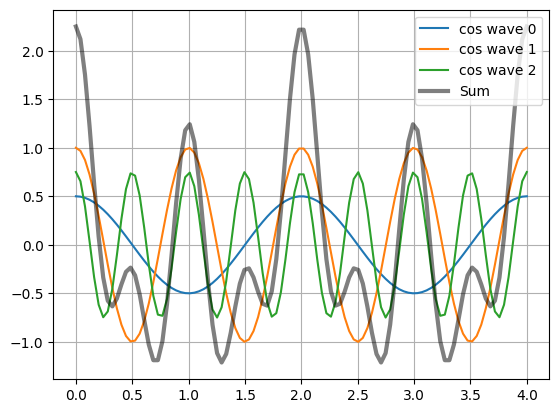

In [ ]:
# rebuild sum of 3 cosine waves here
om = np.array([np.pi,2*np.pi,4*np.pi])
Twave = 2*np.pi/om
print(Twave)
amp = [0.5,1,0.75]
phi = [np.pi/2,np.pi,3*np.pi/2]
phi = np.zeros(len(om))
t = np.linspace(0,4,100)
plt.figure()
sumwave = np.zeros(len(t))
for i,o in enumerate(om):
  y = amp[i]*np.cos(om[i]*t+phi[i])
  sumwave += y
  plt.plot(t,y,label=f"cos wave {i}")
plt.plot(t,sumwave,lw='3',color='k',ls='-',label='Sum',alpha=0.5)
plt.grid()
plt.legend()

In [ ]:
# pass your y array into your dft function
mydftfunc = dft(sumwave)

In [ ]:
# compare the output from your function with the output from np.fft.fft
# plot the frequency spectrum for both
compare=fft(sumwave)


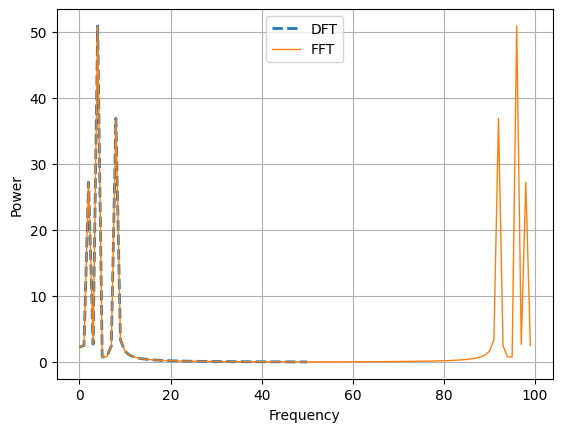

In [ ]:
#This creates the plot
plt.plot(np.abs(mydftfunc), ls='--',  lw='2', label = 'DFT')

plt.plot(np.abs(compare),  lw = '1', label = 'FFT')

plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# time how long it takes the dft function to run
%time dft(sumwave)

CPU times: user 27.5 ms, sys: 0 ns, total: 27.5 ms
Wall time: 96 ms


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

In [ ]:
# time how long it takes the fft fuction to run
%time fft(sumwave)

CPU times: user 94 µs, sys: 0 ns, total: 94 µs
Wall time: 99.2 µs


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

# Part 2: The Inverse Fourier Transform

(5 points)

Take the `fft` and then the `ifft` of your summed cosine wave.

```
Y = fft(sumwave)
ynew = ifft(Y)
```

Compare the output of the `ifft` (ynew) with the original wave (sumwave). To do this, plot both waves on the same plot.  Plot the original with a solid line and the recreated wave with black circles.  Be sure to add a legend and lable your axes.

Here is my result for comparison:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p2.png" width=300 >

In [ ]:
# your code here
Y = fft(sumwave)
ynew = ifft(Y)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


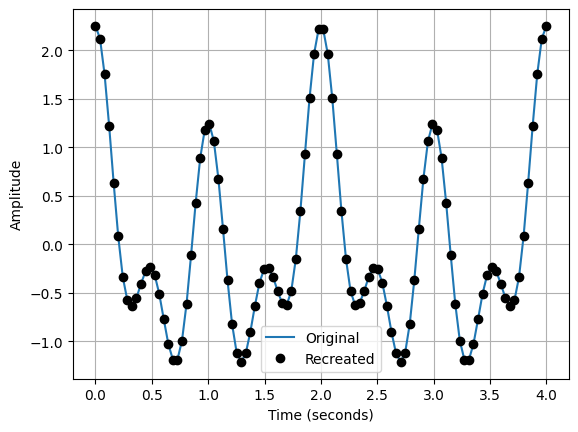

In [ ]:
# your plot here
plt.plot(t,sumwave, label = 'Original', linestyle = '-')
plt.plot(t,ynew, 'ko' , label = 'Recreated' )
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Part 3: Filter out noise from an audio signal

(5 points)

Make a program that will filter out noise from an audio signal.  
* To do this, you should construct a sine or cosine function, with a frequency of 1 Hz.

* Add two additional cosine functions with a frequency that are 10 and 15 times higher and an amplitude that is 10 and 15 times lower.

* We will consider the high frequency waves to be noise.

* Make a function called `filter_noise` that takes the input wave and returns the cleaned function

Here is the wave I made:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3a.png" width=300 >


Here is the a figure showing the Fourier components of the original and cleaned signal:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3b.png" width=300 >

Here is my input and cleaned signals:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3c.png" width=300 >

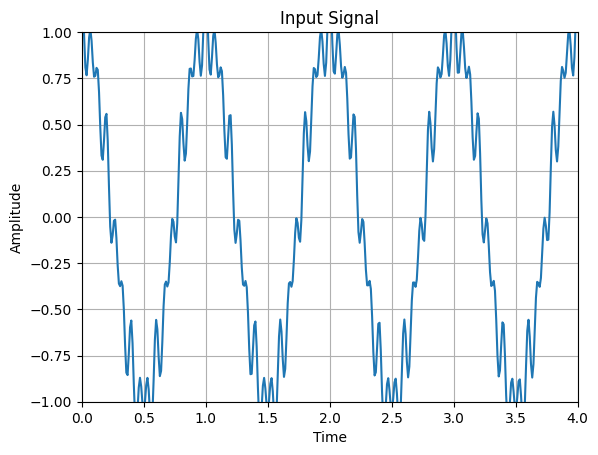

In [ ]:
# Your code here to construct input signal
t = np.linspace(0,10,1000)
input_signal = np.cos(2* np.pi * t ) + 0.1 * np.cos(20 * np.pi * t ) + 0.15 * np.cos(30 * np.pi * t )

# plot the input signal
plt.plot(t,input_signal)
plt.xlabel('Time')
plt.xlim(0,4)
plt.ylabel('Amplitude')
plt.ylim(-1,1)
plt.title('Input Signal')
plt.grid()
plt.show()

In [ ]:
def filter_noise(y,fmax=10):
  # take the fft
  Y = np.fft.rfft(y)
  n= len(t)

  TMAX = (t[1] - t[0]) * (n-1)
  df = 1/TMAX
  frequency = np.arange(int(n/2+1))* df
  # filter noise - any frequencies above fmax
  Yfiltered = Y.copy()
  Yfiltered[frequency >= fmax] = 0


   # take the ifft of the filtered wave
  yfiltered = np.fft.irfft(Yfiltered)
  # return results
  return yfiltered

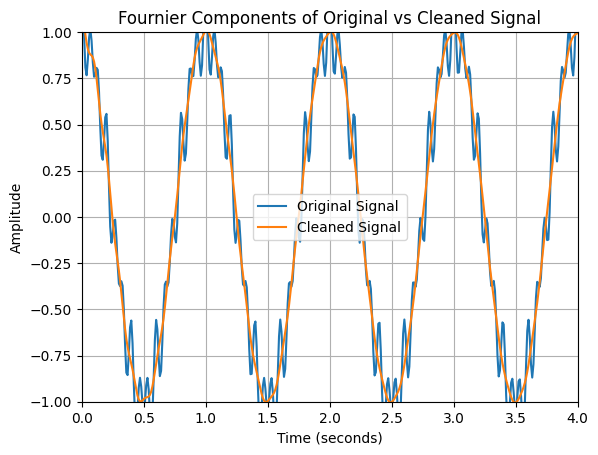

In [ ]:
plt.plot(t, input_signal, label='Original Signal')
plt.plot(t, filter_noise(input_signal), label='Cleaned Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Fournier Components of Original vs Cleaned Signal')
plt.xlim(0,4)
plt.ylim(-1,1)
plt.legend()
plt.grid()
plt.show()

# Part 4: Read in wav file and analyze it

(10 points)

We'll explore how the different combinations of waves (called *overtones*) produces different timbres for different instruments.

First we'll listen to and then download some files of different instruments playing the same note: C4, which is the same as 262 Hz, for the dominant wave.

These .wav files come from [the University of Iowa musical instrument samples](https://www.ee.columbia.edu/~dpwe/sounds/instruments/).

In [ ]:
from IPython.display import Audio,display

In [ ]:
url_trumpet='https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav'
url_violin='https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav'
url_flute='https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav'
url_piano='https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav'

Audio(url=url_trumpet)
Audio(url=url_violin)
Audio(url=url_flute)
Audio(url=url_piano)


Now download the wav files for analysis.

In [ ]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav -O pianoC4.wav

--2024-03-21 20:19:49--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59544 (58K) [audio/x-wav]
Saving to: ‘pianoC4.wav’

pianoC4.wav         100%[===================>]  58.15K  --.-KB/s    in 0.001s  

2024-03-21 20:19:50 (82.2 MB/s) - ‘pianoC4.wav’ saved [59544/59544]



In [ ]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav -O trumpetC4.wav

--2024-03-21 20:19:57--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172210 (168K) [audio/x-wav]
Saving to: ‘trumpetC4.wav’

trumpetC4.wav       100%[===================>] 168.17K  --.-KB/s    in 0.04s   

2024-03-21 20:19:58 (3.86 MB/s) - ‘trumpetC4.wav’ saved [172210/172210]



In [ ]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav -O violinC4.wav


--2024-03-21 20:20:03--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77044 (75K) [audio/x-wav]
Saving to: ‘violinC4.wav’

violinC4.wav        100%[===================>]  75.24K  --.-KB/s    in 0.02s   

2024-03-21 20:20:03 (3.76 MB/s) - ‘violinC4.wav’ saved [77044/77044]



In [ ]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav -O fluteC4.wav

--2024-03-21 20:20:07--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72544 (71K) [audio/x-wav]
Saving to: ‘fluteC4.wav’

fluteC4.wav         100%[===================>]  70.84K  --.-KB/s    in 0.02s   

2024-03-21 20:20:07 (3.63 MB/s) - ‘fluteC4.wav’ saved [72544/72544]



### Reading in a wav file

There are many tools to read in wave files.  We will use `scipy.io.wavfile`, but also check out [`librosa`](https://librosa.org/doc/latest/index.html).

In [ ]:
from scipy.io import wavfile


In [ ]:
!ls

fluteC4.wav  pianoC4.wav  sample_data  trumpetC4.wav  violinC4.wav


In [ ]:
samplerate_piano, signal_piano = wavfile.read('pianoC4.wav')
samplerate_violin, signal_violin = wavfile.read('violinC4.wav')
samplerate_flute, signal_flute = wavfile.read('fluteC4.wav')
samplerate_trumpet, signal_trumpet = wavfile.read('trumpetC4.wav')

In [ ]:
Audio(data=signal_piano, rate=samplerate_piano)

In [ ]:
Audio(data=signal_violin, rate=samplerate_violin)

In [ ]:
Audio(data=signal_flute, rate=samplerate_flute)

In [ ]:
Audio(data=signal_trumpet, rate=samplerate_trumpet)

Text(0, 0.5, 'amplitude')

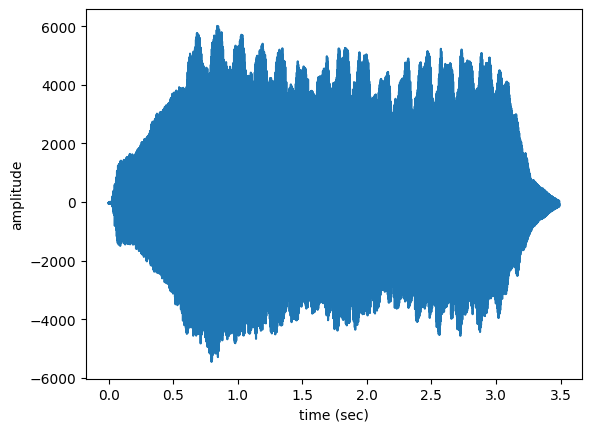

In [ ]:
# here is an example of how to plot the violin data
N = len(signal_violin)
T = 1/samplerate_violin
t = N/samplerate_violin # length of recording
t_array = np.arange(0,t,T)
plt.plot(t_array,signal_violin)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

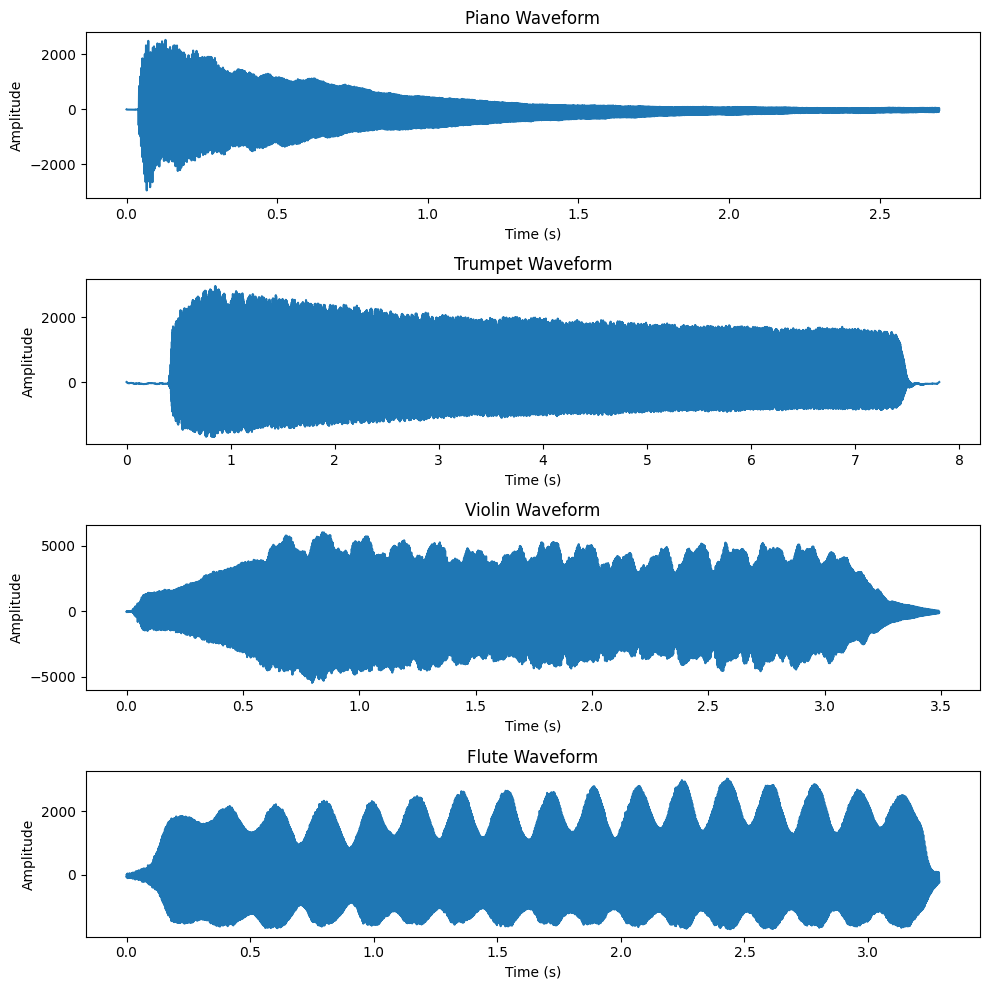

In [ ]:
# compare all 4 audio files in one figure with 4 rows and 1 column
plt.figure(figsize=(10, 10))
# waveform for piano
plt.subplot(4, 1, 1)
plt.plot(np.arange(len(signal_piano)) / samplerate_piano, signal_piano)
plt.title('Piano Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# waveform for trumpet
plt.subplot(4, 1, 2)
plt.plot(np.arange(len(signal_trumpet)) / samplerate_trumpet, signal_trumpet)
plt.title('Trumpet Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# waveform for violin
plt.subplot(4, 1, 3)
plt.plot(np.arange(len(signal_violin)) / samplerate_violin, signal_violin)
plt.title('Violin Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# waveform for flute
plt.subplot(4, 1, 4)
plt.plot(np.arange(len(signal_flute)) / samplerate_flute, signal_flute)
plt.title('Flute Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


### Plot the fft output (power versus frequency) for all 4 instruments

Remember to just plot the first have of the output arrays:
```
plt.plot(frequency[:N//2+1],np.abs(Y[:N//2+1]))
````

Here are my results for the input signal and fft spectrum:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4a.png" height=500 ><img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4b.png" height=500 >


In [ ]:
# plot the output from fft (plot power versus frequency) for all 4 instruments

#Here I tuned everything into arrays so that it would be a lot easier to graph.

time_piano = np.linspace(0, len(signal_piano) / samplerate_piano, len(signal_piano))
time_trumpet = np.linspace(0, len(signal_trumpet) / samplerate_trumpet, len(signal_trumpet))
time_violin = np.linspace(0, len(signal_violin) / samplerate_violin, len(signal_violin))
time_flute = np.linspace(0, len(signal_flute) / samplerate_flute, len(signal_flute))

#Making the fft of each instrument here
fft_piano = np.fft.fft(signal_piano)
fft_trumpet = np.fft.fft(signal_trumpet)
fft_violin = np.fft.fft(signal_violin)
fft_flute = np.fft.fft(signal_flute)

# Here are my frequency arrays
frequency_piano = np.fft.fftfreq(len(fft_piano), 1 / samplerate_piano)
frequency_trumpet = np.fft.fftfreq(len(fft_trumpet), 1 / samplerate_trumpet)
frequency_violin = np.fft.fftfreq(len(fft_violin), 1 / samplerate_violin)
frequency_flute = np.fft.fftfreq(len(fft_flute), 1 / samplerate_flute)



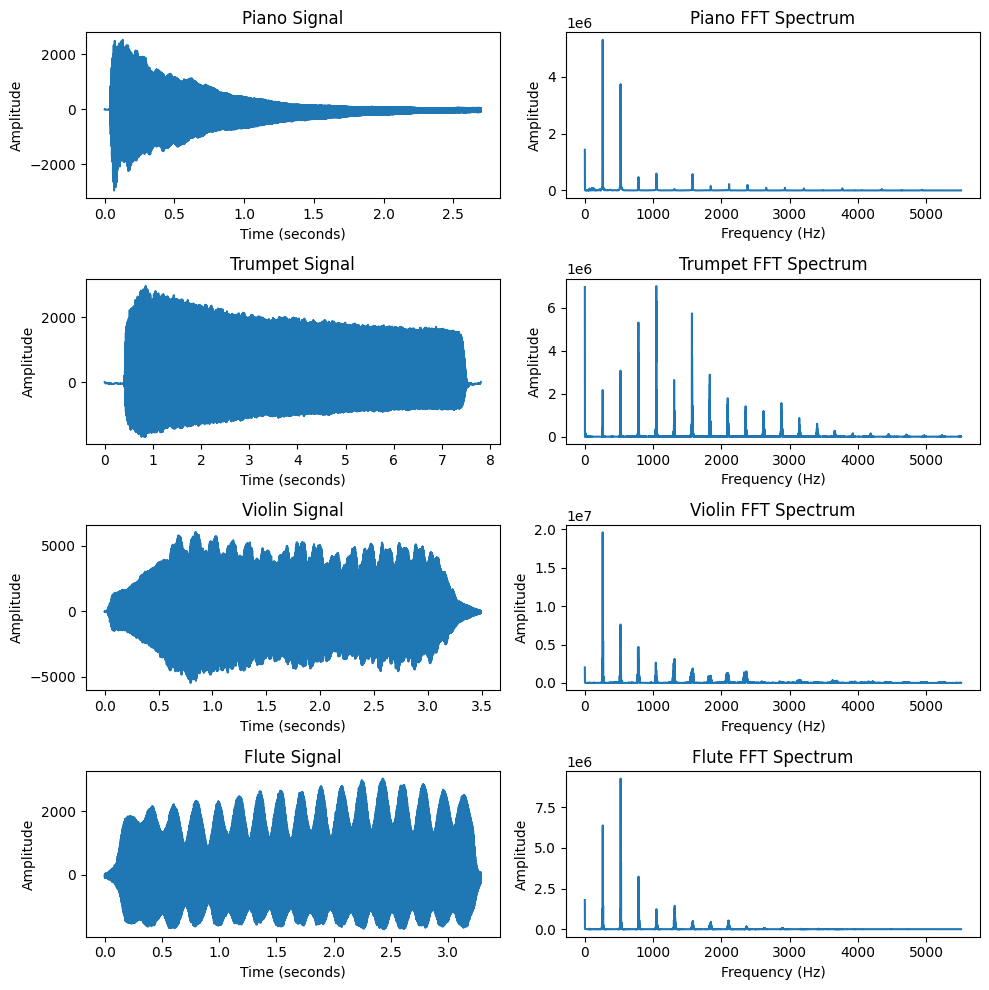

In [ ]:
plt.figure(figsize=(10, 10))

# The first 4 graphs on the left side, are the time vs the signal for each instrument.

plt.subplot(4, 2, 1)
plt.plot(time_piano, signal_piano)
plt.title('Piano Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 3)
plt.plot(time_trumpet, signal_trumpet)
plt.title('Trumpet Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 5)
plt.plot(time_violin, signal_violin)
plt.title('Violin Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 7)
plt.plot(time_flute, signal_flute)
plt.title('Flute Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# The plots on the right hand side are going to be the fft of each instrument
plt.subplot(4, 2, 2)
plt.plot(frequency_piano[:len(fft_piano)//2], np.abs(fft_piano[:len(fft_piano)//2]))
plt.title('Piano FFT Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 4)
plt.plot(frequency_trumpet[:len(fft_trumpet)//2], np.abs(fft_trumpet[:len(fft_trumpet)//2]))
plt.title('Trumpet FFT Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 6)
plt.plot(frequency_violin[:len(fft_violin)//2], np.abs(fft_violin[:len(fft_violin)//2]))
plt.title('Violin FFT Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(4, 2, 8)
plt.plot(frequency_flute[:len(fft_flute)//2], np.abs(fft_flute[:len(fft_flute)//2]))
plt.title('Flute FFT Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### Add noise to a wav file

* Download a wav file from the web, make your own, or use one of the files we already downloaded.

* Read in the file and take the `fft`.

* Add noise to the data by setting one of the fourier coefficients to a non-zero value.

* Take the `ifft` to create a new sound file.

* Play the file with noise

```Audio(data=newsignal, rate=samplerate)```


In [ ]:
# Reading in the violin audio file from before
samplerate_violin, signal_violin = wavfile.read('violinC4.wav')


In [ ]:
fft_violin = np.fft.fft(signal_violin)

#set the coefficient to a non-zero number
fft_violin[10] = 1000

In [ ]:
# ifft is the inverse fft
new_signal = np.fft.ifft(fft_violin)


Audio(data=new_signal, rate=samplerate_violin)

### Using phyphox

Use phyphox to analyze the frequency spectrum of each wave and compare it to your results.